# KDM5C transcriptomics cis comparison

## Step 1: Library Imports

Run this cell to import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import sys 
sys.path.append('C:\\Users\\brittany henderson\\GitHub\\WhenMutationsMatter\\Brittany\\')
import functions as f

import cptac
import cptac.algorithms as al

## Step 2: Find the frequently mutated genes for Endometrial Cancer

Enter the type of cancer and the cutoff for mutation frequency that you would like to use.

In [2]:
rc_object = cptac.RenalCcrcc()
desired_cutoff = 0.1

renal_freq_mut = al.get_frequently_mutated(rc_object, cutoff = desired_cutoff)
renal_freq_mut.loc[renal_freq_mut['Gene'] == 'KDM5C']

,Gene,Unique_Samples_Mut,Missence_Mut,Truncation_Mut
1,KDM5C,0.172727,0.036364,0.145455


## Step 3: Select KDM5C, a frequently mutated gene

In [3]:
gene = 'KDM5C'

## Step 4: Select transcriptomics

In [4]:
omics = rc_object.get_transcriptomics()

## Step 5: cis comparison 

Determine if the DNA mutation has an effect on the omics measurement. In order to do this, we have a few steps in code. The first three steps are found in the format_cis_comparison_data function.
1. get a table with both the omics and mutation data for tumors
2. get a binary column from the mutation data to separate our samples
3. format data frame to be used in the T-test
4. send data to the T-test.
5. visualize data 

In [5]:
# Steps 1-3
rc_status = f.format_cis_comparison_data(rc_object, 'transcriptomics', gene)


In [6]:
omics_col_list = [gene+'_transcriptomics']
transcriptomics_col = gene+'_transcriptomics'

# Step 4 - T-test comparing means of mutated vs. wildtype effect on cis omics
print("Doing t-test comparison for mutation status\n")
significant_pval_results = al.wrap_ttest(rc_status, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation status

              Comparison   P_Value
0  KDM5C_transcriptomics  0.000038


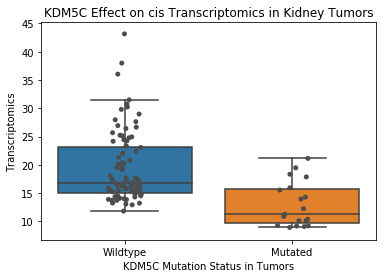

In [7]:
# Step 5 - Create box plot to compare wildtype and mutated effect on omics data
cis_boxplot = sns.boxplot(data = rc_status, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Wildtype","Mutated"], showfliers = False)  
cis_boxplot.set_title(gene + " Effect on cis Transcriptomics in Kidney Tumors")
cis_boxplot = sns.stripplot(data= rc_status, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Wildtype","Mutated"])
cis_boxplot.set(xlabel = gene + " Mutation Status in Tumors", ylabel = "Transcriptomics")
plt.show()

Repeat above steps with mutation type comparison (missense vs. truncation)

In [8]:
# Prepare data frame for T-test
rc_type = f.get_missence_truncation_comparison(rc_object, 'transcriptomics', gene)
#print(en_type.head())

In [9]:
# T-test comparing means of missense vs. truncation effect on cis omics
print("Doing t-test comparison for mutation type\n")
significant_pval_results = al.wrap_ttest(rc_type, 'binary_mutations', omics_col_list)
print(significant_pval_results)

Doing t-test comparison for mutation type

No significant comparisons.
None


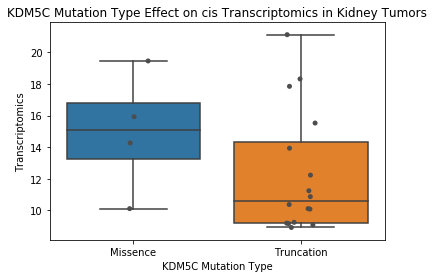

In [10]:
# Step 5 - Create boxplt to compare missense and truncation type effect on omics data
rc_cis_boxplot = sns.boxplot(data = rc_type, x = 'binary_mutations',
                          y = transcriptomics_col, order = ["Missence","Truncation"], showfliers = False)  
rc_cis_boxplot.set_title(gene + " Mutation Type Effect on cis Transcriptomics in Kidney Tumors")
rc_cis_boxplot = sns.stripplot(data = rc_type, x = 'binary_mutations',
                            y = transcriptomics_col,jitter = True, color = ".3", order = ["Missence","Truncation"])
rc_cis_boxplot.set(xlabel = gene + " Mutation Type", ylabel = 'Transcriptomics')
plt.show()

# Analysis of Results